# Part 1. Feature Engineering

In [1]:
# Импортируем необходимые библиотеки и загружаем датасет
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")

## 1. EDA

In [2]:
# Посмотрим какие поля есть в датасете вытащив 10 первых записей
titanic.head(10).T

,0,1,2,3,4,5,6,7,8,9
survived,0,1,1,1,0,0,0,0,1,1
pclass,3,1,3,1,3,3,1,3,3,2
sex,male,female,female,female,male,male,male,male,female,female
age,22.0,38.0,26.0,35.0,35.0,NaN,54.0,2.0,27.0,14.0
sibsp,1,1,0,1,0,0,0,3,0,1
parch,0,0,0,0,0,0,0,1,2,0
fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708
embarked,S,C,S,S,S,Q,S,S,S,C
class,Third,First,Third,First,Third,Third,First,Third,Third,Second
who,man,woman,woman,woman,man,man,man,child,woman,child


In [3]:
# Смотрим основную информацию о датасете
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Выше можно увидеть, что большинство пустых значении в столбцах "deck" и "age"

In [4]:
# Проверяем какой процент недостающих данных по столбцам
titanic.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

Около 20% данных недостают в столбце 'age' и 77% в столбце 'deck'

In [5]:
# Смотрим основные статистические показатели
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Основные инсайты из показателей выше:
*   средний возраст пассажиров - 30 лет
*   только 38% пассажиров выжило

In [6]:
# Просмотрим информацию об уникальных значениях в каждом столбце
titanic.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

Основные выводы:
* на Титанике было 7 палуб
* комфортность на Титанике делилась на 3 класса
* Титаник собирал пассажиров из портов 3-х разных городов


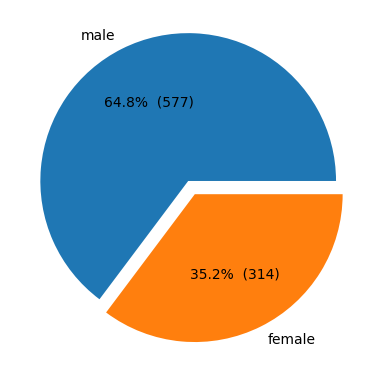

In [7]:
# Посмотрим распределение пассажиров по полу
sex_count = titanic["sex"].value_counts()
plt.pie(sex_count, labels=sex_count.index.tolist(), explode=[0.1, 0], autopct=lambda p : '{:.1f}%  ({:,.0f})'.format(p,p * sum(sex_count)/100))
plt.show()

Почти 65% пассажиров были мужчинами

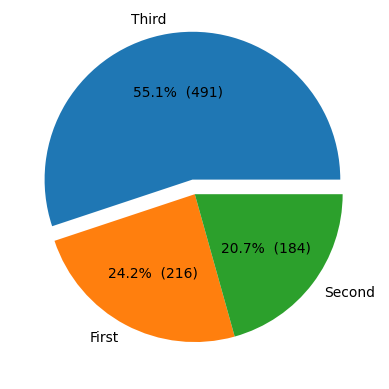

In [8]:
# Посмотрим распределение пассажиров по классам комфорта
class_count = titanic["class"].value_counts()
plt.pie(class_count, labels=class_count.index.tolist(), explode=[0.1, 0, 0], autopct=lambda p : '{:.1f}%  ({:,.0f})'.format(p,p * sum(class_count)/100))
plt.show()

Большинство пассажиров купили билеты 3-го класса

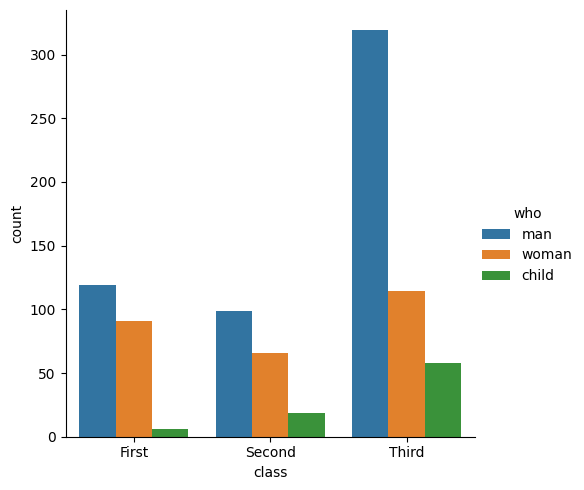

In [9]:
# Построим график распределения мужчин, женщин и детей по классам комфорта
sns.catplot(data=titanic, x="class", hue="who", kind="count")
plt.show()

Из графика можно заметить, что в 3-классе мужчин в гораздо раз больше чем женщин и детей по сравнению с другими классами

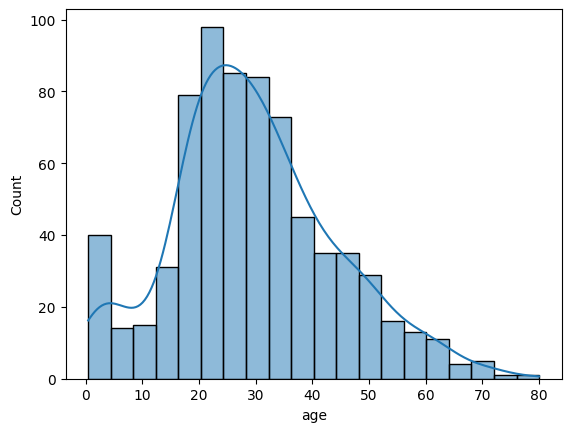

In [10]:
# Распределение пассажиров по возрасту
sns.histplot(data=titanic, x="age", kde=True)
plt.show()

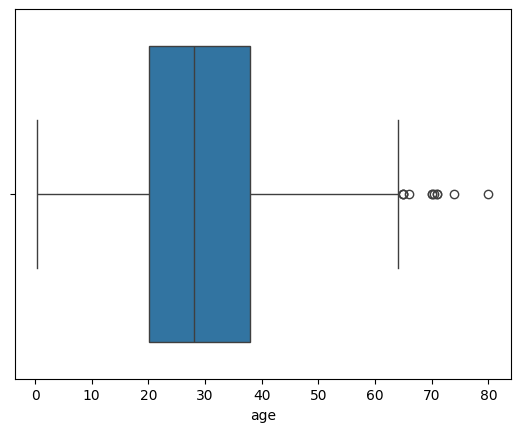

In [11]:
sns.boxplot(data=titanic, x="age")
plt.show()

На графиках выше видно, что распределение по возрасту соответствует хоть не идеальному но нормальному распределению с положительной асимметрией, с несколькими выбросами выше 65

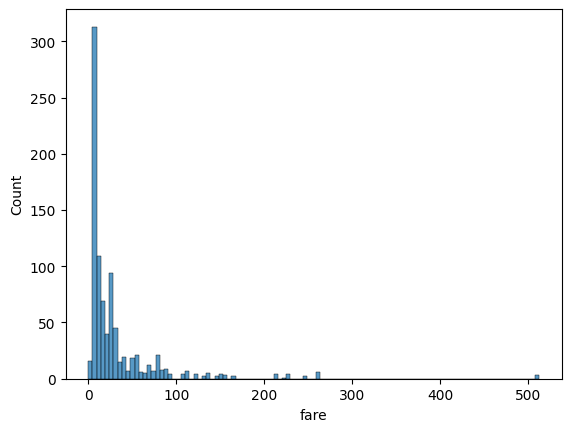

In [12]:
# Построим график стоимости проданных билетов
sns.histplot(data=titanic, x="fare")
plt.show()

Из графика видно, что большинство (более 300) пассажиров купили билеты по самым низким ценам.
Некоторым билеты обошлись за более $500

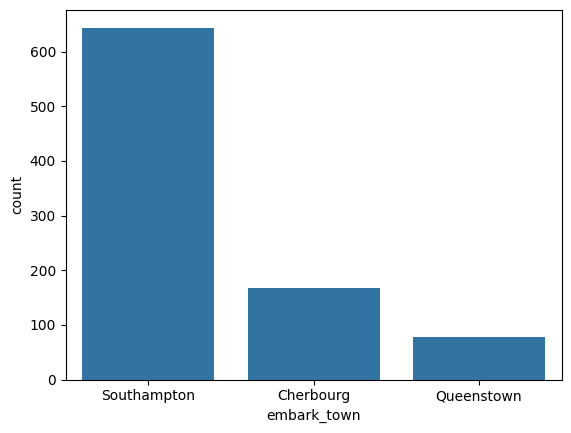

In [13]:
# Распределение пассажиров по местам посадки
sns.countplot(data=titanic, x="embark_town")
plt.show()

Подавляющее большинство пассажиров сели на Титаник в Саутгемптоне

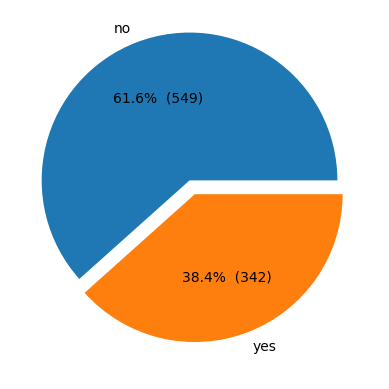

In [14]:
# Диаграмма выживших
alive_count = titanic["alive"].value_counts()
plt.pie(alive_count, labels=alive_count.index.tolist(), explode=[0.1, 0], autopct=lambda p : '{:.1f}%  ({:,.0f})'.format(p,p * sum(alive_count)/100))
plt.show()

Только 38% пассажиров выжило

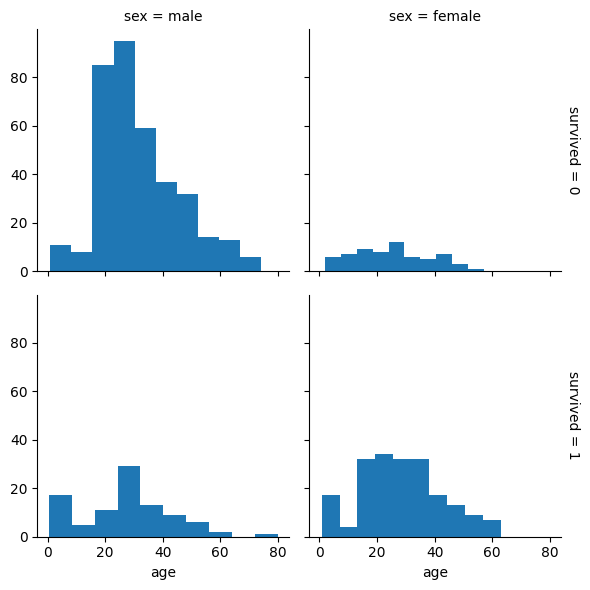

In [15]:
# Распределение выживших и погибших по полу и возрасту
sns.FacetGrid(titanic, col="sex", row="survived", margin_titles=True).map(plt.hist, "age")
plt.show()

Из графика можно увидеть, что больше всего погибло мужчин в возрасте от 20 до 40, а среди спасенных оказалось больше женщин.

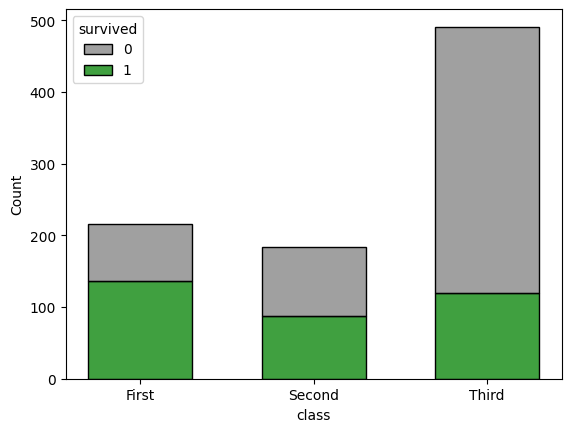

In [16]:
# Распределение выживших и погибших по классам комфорта
sns.histplot(data=titanic, x="class", hue="survived", multiple="stack", palette = {0: 'gray', 1: 'green'}, shrink=.6)
plt.show()

Больше всего людей спаслось из 1-класса, погибло из 3-класса.

<ipython-input-17-5349ec64dd72>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), annot=True, cmap="coolwarm")


<Axes: >

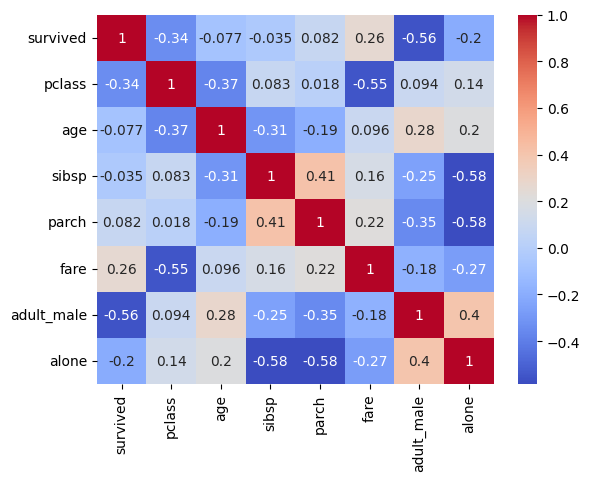

In [17]:
# Построим таблицу корреляции
sns.heatmap(titanic.corr(), annot=True, cmap="coolwarm")

Колонка survived имеет наиболее высокую обратную корреляцию с колонками adult_male и pclass, что является истиной согласно графикам выше: меньше мужчин выжило нежели женщин, также больше людей находившихся на 1-классе выжило.

## 2. Проблемы со столбцами - дубликаты и мультиколлинеарные столбцы.

In [18]:
# Колонки 'alive', 'class' и 'embark_town' являются дубликатами столбцов 'survived', 'pclass' и 'embarked' поэтому удаляем их
# Также удалим из датасета колонки 'who' и 'adult_male', так как они не несут новую информацию, всю информацию можно передать через 'sex'/'age'
titanic_prepared = titanic.drop(['alive','class','embark_town','who','adult_male'], axis=1)
titanic_prepared.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,C,False
2,1,3,female,26.0,0,0,7.9250,S,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,C,False
4,0,3,male,35.0,0,0,8.0500,S,NaN,True


In [19]:
# Колонки 'sibsp' и 'parch' можно объединить в одну колонку указывающую на количество родственников пассажира на борту
# Удалим колонку 'alone' так как эту информацию можно будет найти в колонке с количеством родственников, если равно 0
titanic_prepared['family'] = titanic_prepared['sibsp']+titanic_prepared['parch']
titanic_prepared = titanic_prepared.drop(['sibsp','parch','alone'], axis=1)
titanic_prepared.head()

,survived,pclass,sex,age,fare,embarked,deck,family
0,0,3,male,22.0,7.2500,S,NaN,1
1,1,1,female,38.0,71.2833,C,C,1
2,1,3,female,26.0,7.9250,S,NaN,0
3,1,1,female,35.0,53.1000,S,C,1
4,0,3,male,35.0,8.0500,S,NaN,0


In [20]:
# Попробуем восстановить недостающие данные
# Всего 2 записей не хватает в поле 'embarked', поэтому заполним недостающие записи с наиболее чаще встречающимся значением
titanic_prepared['embarked'].fillna("S", inplace=True)
# Для замещения недостающих данных колонки  используем медианное значение, так как она более устойчива к выбросам и несимметричным данным
titanic_prepared['age'].fillna(titanic_prepared['age'].median(), inplace=True)
# 77% процентов данных недостает в колонке 'deck', будет сложно восстановить данные, целесообразнее удалить столбец из датасета
titanic_prepared = titanic_prepared.drop(['deck'], axis=1)
titanic_prepared.head()

,survived,pclass,sex,age,fare,embarked,family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [21]:
titanic_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   fare      891 non-null    float64
 5   embarked  891 non-null    object 
 6   family    891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


## 3. Преобразование категориальных переменных

In [22]:
# Трансформируем колонки 'sex' и 'embarked' через One-Hot Encoding
titanic_prepared = pd.get_dummies(titanic_prepared)
titanic_prepared

,survived,pclass,age,fare,family,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,7.2500,1,0,1,0,0,1
1,1,1,38.0,71.2833,1,1,0,1,0,0
2,1,3,26.0,7.9250,0,1,0,0,0,1
3,1,1,35.0,53.1000,1,1,0,0,0,1
4,0,3,35.0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,0,1,0,0,1
887,1,1,19.0,30.0000,0,1,0,0,0,1
888,0,3,28.0,23.4500,3,1,0,0,0,1
889,1,1,26.0,30.0000,0,0,1,1,0,0
